In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
# 한글 깨짐 방지
matplotlib.rcParams['font.family']='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False

In [2]:
data = {'aa':10,'bb':20,'cc':30,'dd':40, 'ee':50}
sr = pd.Series(data, name='국어점수')
sr

aa    10
bb    20
cc    30
dd    40
ee    50
Name: 국어점수, dtype: int64

In [3]:
sr.max()

50

In [4]:
sr.min()

10

### 인덱스 추출
- Numpy
    - argmax()
-Series
    - idxmax()
    - Return the **row label** of the maximum value.

In [4]:
sr.idxmax()

'ee'

In [5]:
# 45 이하인 데이터의 가장 큰 값을 구하시요.
sr[ sr <= 45 ].max()

40

In [9]:
sr[ sr <= 45 ].idxmax() ## index 추출

'dd'

In [6]:
sr[ sr[ sr <= 45 ].idxmax() ]
# 참조변수가 없으면 메모리에 저장되어 있음

40

In [10]:
sr.head(2)

aa    10
bb    20
Name: 국어점수, dtype: int64

In [11]:
sr.tail(2)

dd    40
ee    50
Name: 국어점수, dtype: int64

In [12]:
sr.nlargest(2)

ee    50
dd    40
Name: 국어점수, dtype: int64

In [13]:
sr['cc'] = 40
sr

aa    10
bb    20
cc    40
dd    40
ee    50
Name: 국어점수, dtype: int64

In [14]:
sr.nlargest(2,keep='all')

ee    50
cc    40
dd    40
Name: 국어점수, dtype: int64

In [15]:
sr.nsmallest(2)

aa    10
bb    20
Name: 국어점수, dtype: int64

In [16]:
sr.mean()

32.0

In [23]:
sr.sum()

160

In [17]:
sr.median()

40.0

In [61]:
sr.std()

16.431676725154983

In [21]:
q25, q50, q75 = sr.quantile([0.25,0.5,0.75])
q25, q50, q75

(20.0, 40.0, 40.0)

In [23]:
sr.unique()

array([10, 20, 40, 50], dtype=int64)

In [26]:
print(sr)
sr.value_counts()

aa    10
bb    20
cc    40
dd    40
ee    50
Name: 국어점수, dtype: int64


40    2
20    1
10    1
50    1
Name: 국어점수, dtype: int64

In [27]:
def fn(v):
#     if v > 30:
#         return v+1
#     else:
#         return v+2
    return v+1 if v>30 else v+2 # 삼항 연산자

In [32]:
# 30 초과면 +1, 이하면 +2를 하는 함수를 만들기
def fn(x):
    return x+1 if x > 30 else x+2 # 삼항 연산자

In [33]:
sr.apply( fn )

aa    12
bb    22
cc    41
dd    41
ee    51
Name: 국어점수, dtype: int64

- Q. 그냥 Series + 1하면 안 되나?
- A. 가능하지만 apply를 사용하면 사용자가 작성한 조건에 맞추어 데이터 처리가 가능해짐
- **조건별 연산 가능**

In [34]:
sr.apply( lambda v: v+1 if v > 30 else v+2 )

aa    12
bb    22
cc    41
dd    41
ee    51
Name: 국어점수, dtype: int64

In [45]:
sr.apply( lambda v: "합격" if v >= 40 else '불합격')
# 함수가 한 줄로 간결할 때 람다 사용

aa    불합격
bb    불합격
cc     합격
dd     합격
ee     합격
Name: 국어점수, dtype: object

### EDA에서 주로 활용하는 방법
- EDA: 데이터 자체에서 인사이트를 얻는 방법
    - pd.cut() : 도수분포표
    - 비율
    - 시각화
    - 이상치

In [41]:
pd.cut(sr, 5) # 9.96 < aa <= 18.0

aa    (9.96, 18.0]
bb    (18.0, 26.0]
cc    (34.0, 42.0]
dd    (34.0, 42.0]
ee    (42.0, 50.0]
Name: 국어점수, dtype: category
Categories (5, interval[float64]): [(9.96, 18.0] < (18.0, 26.0] < (26.0, 34.0] < (34.0, 42.0] < (42.0, 50.0]]

In [48]:
pd.cut( sr, bins=5 ).value_counts().sort_index()
# 계급, 도수

(9.96, 18.0]    1
(18.0, 26.0]    1
(26.0, 34.0]    0
(34.0, 42.0]    2
(42.0, 50.0]    1
Name: 국어점수, dtype: int64

In [54]:
pd.cut(sr,5).value_counts().sort_index(ascending=True) # 도수분포표

(9.96, 18.0]    1
(18.0, 26.0]    1
(26.0, 34.0]    0
(34.0, 42.0]    2
(42.0, 50.0]    1
Name: 국어점수, dtype: int64

In [50]:
pd.cut( sr, bins=[0,20,40,60] ).value_counts().sort_index(ascending=False)
# 계급의 범위를 내가 나눌 수 있음
# 0 < aa <= 20
# 20 < cc <= 40   
# ---> 이 계급에 속한다.

(40, 60]    1
(20, 40]    2
(0, 20]     2
Name: 국어점수, dtype: int64

In [51]:
pd.cut(sr,[0,20,40,60], labels=['C','B','A'])

aa    C
bb    C
cc    B
dd    B
ee    A
Name: 국어점수, dtype: category
Categories (3, object): [C < B < A]

In [52]:
sr.to_csv('a.csv')

In [53]:
pd.read_csv('a.csv')

,Unnamed: 0,국어점수
0,aa,10
1,bb,20
2,cc,40
3,dd,40
4,ee,50


In [63]:
for v in sr:
    print(v) # value 값들이 나옴

print('')
for i in sr.index:
    print(i) # index 값들이 나옴

print('')
for item in sr.items():
    print(item) # index와 value 값이 튜플로 나옴
    

10
20
40
40
50

aa
bb
cc
dd
ee

('aa', 10)
('bb', 20)
('cc', 40)
('dd', 40)
('ee', 50)


In [11]:
for i in sr: # 기본값: sr.values
    print(i) # value 값이 나온다

10
20
30
40
50


In [12]:
for j in sr.index:
    print(j) # 인덱스를 추출하려면 이렇게

aa
bb
cc
dd
ee


In [13]:
for n,a in sr.items():
    print(n,a)

aa 10
bb 20
cc 30
dd 40
ee 50


## 시각화

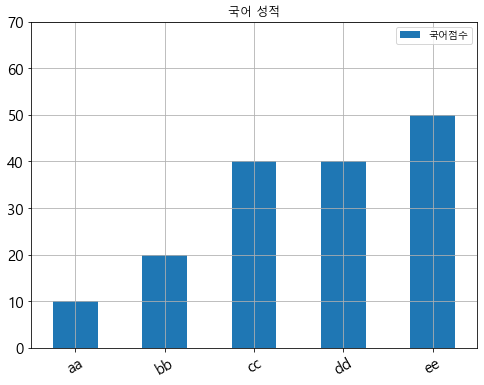

In [64]:
sr.plot(    kind    = 'bar',
            figsize = (8,6), # inch단위
            title   = '국어 성적', # 그래프 제목
            legend  = True, # 그래프 상단에 값표시
            grid    = True, # 그래프 그리드 표시
            ylim    = (0,70), # y축 범위 
            rot     = 30, # x축 글자 회전 각도
            fontsize = 15
       ) 
plt.show()

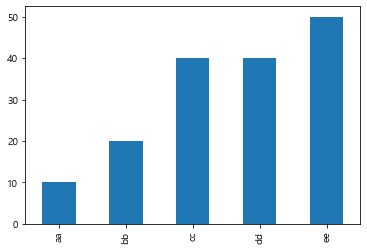

In [67]:
sr.plot( kind='bar')
plt.show()

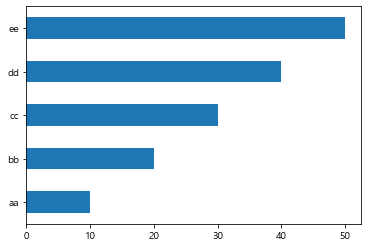

In [15]:
sr.plot(kind='barh')
plt.show()

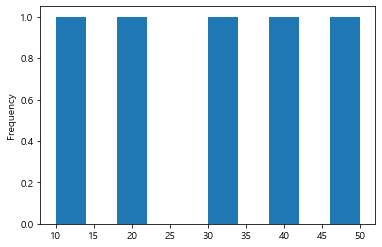

In [20]:
sr.plot(kind='hist')
plt.show()

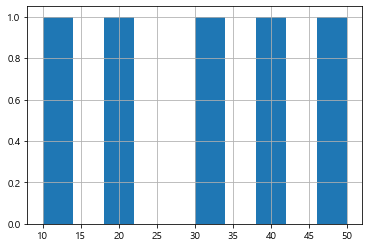

In [19]:
sr.hist()
plt.show()

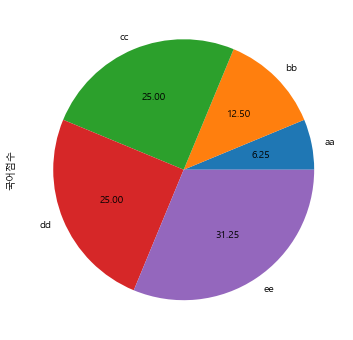

In [68]:
sr.plot(    kind='pie',
            autopct='%.2f',
            figsize = (6,6)
        )
plt.show()

In [121]:
sr.sum()

160

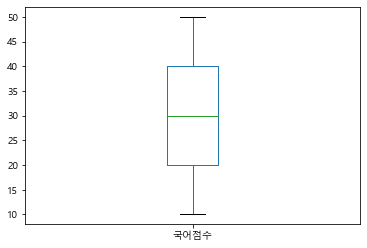

In [6]:
sr.plot(kind='box')
plt.show()

In [7]:
sr.quantile([0.25,0.5,0.75])

0.25    20.0
0.50    30.0
0.75    40.0
Name: 국어점수, dtype: float64